In [1]:
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

     |████████████████████████████████| 68.7 MB 35 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 2.1 MB 32.2 MB/s 
     |████████████████████████████████| 10.1 MB 39.4 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.


In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import numpy as np

In [13]:
import os
! ls

NASDAQ-1-YEAR-DAILY.csv  sample_data


In [15]:
df = pd.read_csv('NASDAQ-1-YEAR-DAILY.csv')

In [16]:
color_list = [
              "blue",
              "orange",
              "green",
              "red",
              "purple",
              "brown",
              "pink",
              "gray",
              "olive",
              "cyan"
]

date_key = "Date"

def Visualization(data):
  time_data = data[date_key]
  features = list(df.select_dtypes(include=[np.number]).columns.values)
  feature_size = len(features)
  fig, axes = plt.subplots(
      nrows =int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=100, facecolor="w", edgecolor="k"
  )
  for i in range(feature_size):
    key = features[i]
    c = color_list[i% (len(color_list))]
    t_data = data[key]
    t_data.index = time_data
    t_data.head()
    ax = t_data.plot(
        ax=axes[i//2, i%2],
        color=c,
        title="{}".format(key),
        rot=25
    )
    ax.legend([key])
    plt.tight_layout()

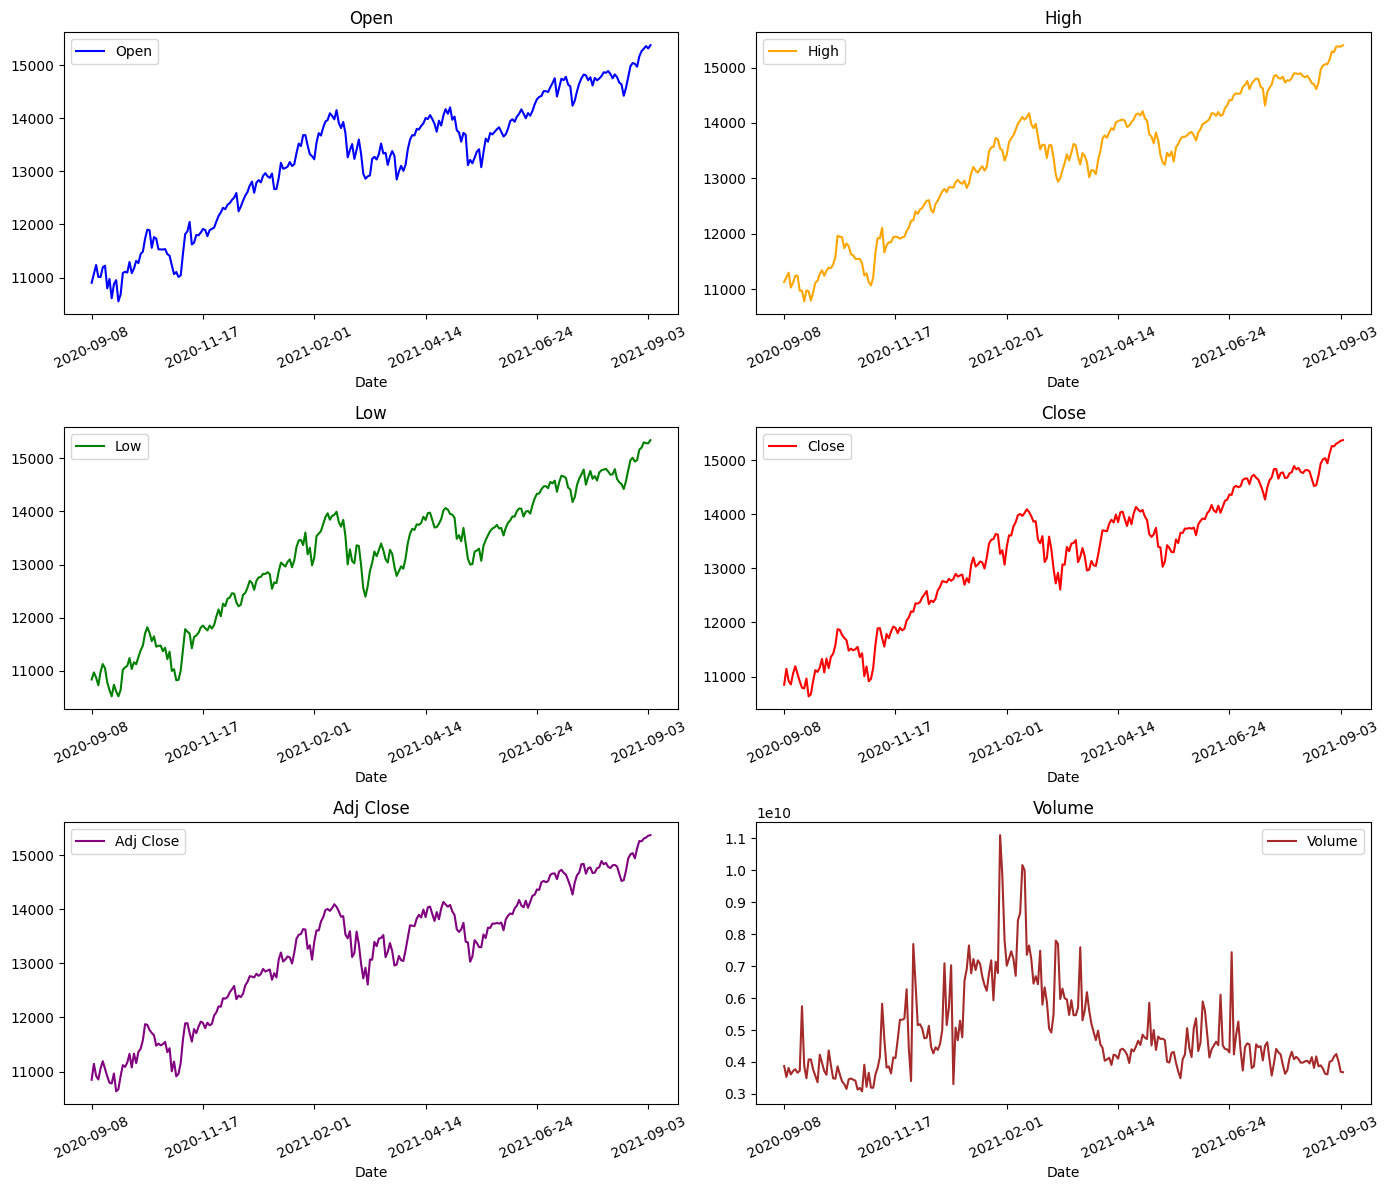

In [17]:
Visualization(df)

In [18]:
df_input = df[['Date','Open','High','Low','Close','Adj Close','Volume']]
df_input = df_input.set_index('Date')

train_time = "2020-09-10"
prediction_length = 144

In [24]:
estimator = DeepAREstimator(freq="1D",
                            context_length=720,
                            prediction_length=prediction_length,
                            num_layers=2,
                            num_cells=128,
                            cell_type='lstm',
                            trainer=Trainer(epochs=8))

In [30]:
from gluonts.dataset.common import ListDataset

training_data = ListDataset(
    [{"start":df_input.index[0], "target": df_input.Close[:50]}],
    freq = "1D"
)

In [1]:
#predictor = estimator.train(training_data=training_data)